# HEART DISEASE PREDICTION 

# OVERVIEW :

## PREDICTING HEART DISESES BASED ON TARGET VARIABLE 

# IMPORTING THE DATASET AND REQ LIB 

In [2]:
import pandas as  pd 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\neeraj\OneDrive\Desktop\Predicting-Heart-Disease-master\dataset.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# FEATURE ENGG :

In [5]:
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A79A09288>,
      dtype=object)

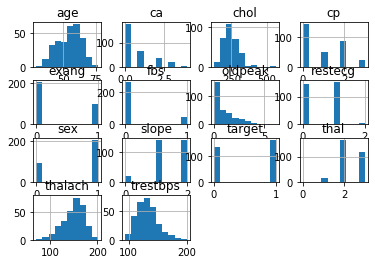

In [7]:
data.hist()

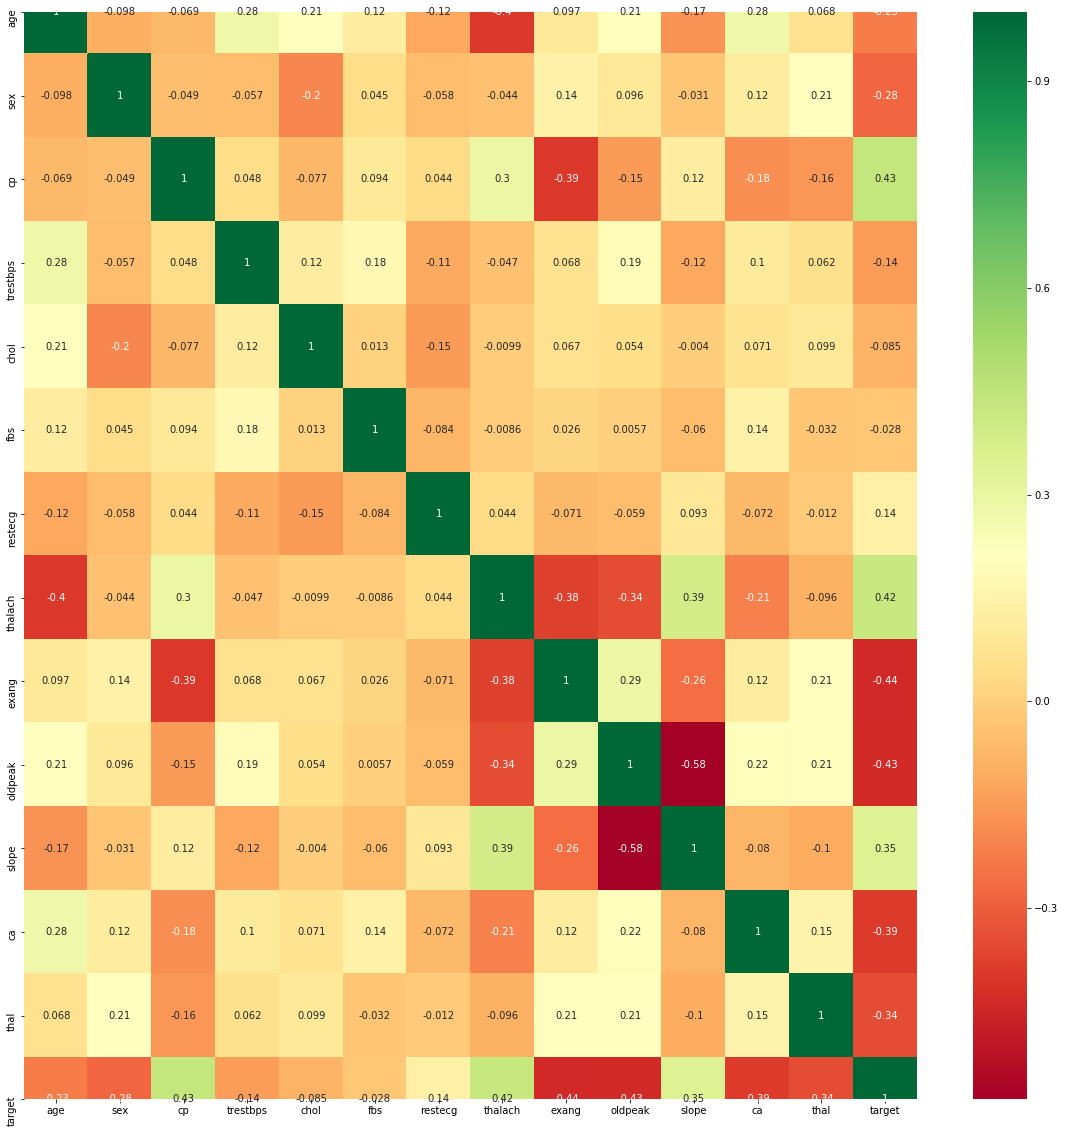

In [8]:

import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# FEATURE SCALING 

In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

# SETTING UP  DATA VARIABLES

In [10]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# RANDOM FOREST :

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  8]
 [ 6 37]]


In [13]:
(25+37)/(25+8+6+37)

0.8157894736842105

# SVM :

In [14]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[26  7]
 [ 5 38]]


In [15]:
(26+38)/(26+38+12)

0.8421052631578947

In [16]:

# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[25  8]
 [ 4 39]]


In [17]:
(25+39)/(25+39+12)

0.8421052631578947

# LOGISTIC REGRESSION :

In [19]:

# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  7]
 [ 4 39]]


In [23]:
(26+39)/(26+39+11)

0.8552631578947368

# XGBOOST CLASSIFIER :

In [25]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[25  8]
 [ 6 37]]


In [26]:
(25+37)/(25+37+14)

0.8157894736842105

In [27]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.92 %
Standard Deviation: 7.00 %


# ANN :

In [31]:
b = dataset['target'].values
A= dataset.drop(['target'], axis = 1).values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A = sc.fit_transform(A)
print(A)

[[ 0.9521966   0.76395577 -0.25633371 ...  3.97911213 -1.10076284
  -0.79311554]
 [-1.91531289 -0.09273778  0.07219949 ... -0.25131234  0.9084609
  -0.79311554]
 [-1.47415758 -0.09273778 -0.81677269 ... -0.25131234  0.9084609
  -0.79311554]
 ...
 [ 1.50364073  0.70684287 -1.029353   ... -0.25131234 -1.10076284
   1.26085034]
 [ 0.29046364 -0.09273778 -2.2275329  ... -0.25131234 -1.10076284
   1.26085034]
 [ 0.29046364 -0.09273778 -0.19835726 ... -0.25131234  0.9084609
  -0.79311554]]


In [32]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

Train on 152 samples, validate on 75 samples
Epoch 1/100
152/152 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5066 - val_loss: 0.6876 - val_accuracy: 0.6400
Epoch 2/100
152/152 [==============================] - 0s 180us/step - loss: 0.6831 - accuracy: 0.5329 - val_loss: 0.6780 - val_accuracy: 0.6533
Epoch 3/100
152/152 [==============================] - 0s 164us/step - loss: 0.6753 - accuracy: 0.5526 - val_loss: 0.6718 - val_accuracy: 0.6667
Epoch 4/100
152/152 [==============================] - 0s 150us/step - loss: 0.6678 - accuracy: 0.6118 - val_loss: 0.6642 - val_accuracy: 0.6933
Epoch 5/100
152/152 [==============================] - 0s 183us/step - loss: 0.6604 - accuracy: 0.6513 - val_loss: 0.6583 - val_accuracy: 0.6800
Epoch 6/100
152/152 [==============================] - 0s 149us/step - loss: 0.6537 - accuracy: 0.6711 - val_loss: 0.6510 - val_accuracy: 0.7200
Epoch 7/100
152/152 [==============================] - 0s 151us/step - loss: 0.6464 - a

In [33]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [34]:
score

0.8289473684210527

## BEST ACCURACY WITH LOGISTIC REGRESSION.

# WHICH IS 85%...!!